# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import numpy as np
import requests 
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import json
from citipy import citipy
import random
from config import api_key
import time
from scipy.stats import linregress


## Generate Cities List

In [2]:
# set latitude and longitude range
lat_range = (-90, 90)
lng_range = (-180, 180)

#Create an empty list for recording cities (latitude/longitude)
lat_lngs  = []
cities = []

# Create a loop to iterate through & append random cities 
lats = np.random.uniform(lat_range[0], lat_range[1], size=1400)
lng = np.random.uniform(lng_range[0], lng_range[1], size=1400)
lat_lngs = zip(lats, lng)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    if city not in cities:
        cities.append(city)
        
# print how many cities are in the list     
print(len(cities))

601


In [3]:
# get response in json format
response = requests.get(f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=metric&q=adrar").json()
response

{'coord': {'lon': -10.0711, 'lat': 20.5022},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 32.3,
  'feels_like': 30.03,
  'temp_min': 32.3,
  'temp_max': 32.3,
  'pressure': 1011,
  'humidity': 14,
  'sea_level': 1011,
  'grnd_level': 968},
 'visibility': 10000,
 'wind': {'speed': 3.89, 'deg': 57, 'gust': 3.77},
 'clouds': {'all': 67},
 'dt': 1619436503,
 'sys': {'country': 'MR', 'sunrise': 1619417610, 'sunset': 1619463739},
 'timezone': 0,
 'id': 2381972,
 'name': 'Adrar',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#create lists to store data
city_name = []
lat =[]
lng =[]
Max_temp =[]
Humidity =[]
Cloudiness =[]
Wind_speed =[]
Country =[]
Date =[]

record_count = 0
set_count = 1

# set url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [5]:
#begin print
print(f'Beginning Data Retrieval \n ---------------')

# Loop through each city
for city in cities:

    response = requests.get(query_url + city).json()
    
    try:
        
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        Max_temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_speed.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
              
        if record_count > 49:
            record_count = 0
            set_count = set_count + 1
             
        else:
            record_count = record_count + 1
            
        print(f'Processing Record {record_count} of Set {set_count} | {city}')
           
    except:
        
        print("City not found. Skipping...")
        
print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")  
        
    

Beginning Data Retrieval 
 ---------------
Processing Record 1 of Set 1 | penzance
Processing Record 2 of Set 1 | grand-santi
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | chenghai
Processing Record 5 of Set 1 | havre
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | pinega
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | nishihara
Processing Record 10 of Set 1 | airai
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | maumere
Processing Record 13 of Set 1 | atbasar
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | torbay
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | sibu
Processing Record 20 of Set 1 | redmond
Processing Record 21 of Set 1 | baykit
Processing Record 22 of Set 1 | chapais
Processing Record 23 of Set 1 | butaritari
Processing Record 24 of Se

Processing Record 33 of Set 4 | sawtell
Processing Record 34 of Set 4 | sechura
Processing Record 35 of Set 4 | sabha
Processing Record 36 of Set 4 | hami
City not found. Skipping...
City not found. Skipping...
Processing Record 37 of Set 4 | san cristobal
Processing Record 38 of Set 4 | ust-maya
Processing Record 39 of Set 4 | berezovka
City not found. Skipping...
Processing Record 40 of Set 4 | bilma
Processing Record 41 of Set 4 | alberton
Processing Record 42 of Set 4 | puyang
City not found. Skipping...
Processing Record 43 of Set 4 | pontian kecil
Processing Record 44 of Set 4 | cabo san lucas
City not found. Skipping...
Processing Record 45 of Set 4 | rapid valley
Processing Record 46 of Set 4 | avera
Processing Record 47 of Set 4 | birao
Processing Record 48 of Set 4 | alyangula
Processing Record 49 of Set 4 | khatanga
Processing Record 50 of Set 4 | kenai
Processing Record 0 of Set 5 | kotovo
Processing Record 1 of Set 5 | ancud
Processing Record 2 of Set 5 | georgetown
Proces

Processing Record 18 of Set 8 | fernie
Processing Record 19 of Set 8 | lac du bonnet
City not found. Skipping...
Processing Record 20 of Set 8 | koppies
Processing Record 21 of Set 8 | narsaq
Processing Record 22 of Set 8 | marawi
Processing Record 23 of Set 8 | naze
Processing Record 24 of Set 8 | taraza
Processing Record 25 of Set 8 | atasu
Processing Record 26 of Set 8 | henties bay
Processing Record 27 of Set 8 | knysna
Processing Record 28 of Set 8 | hare bay
City not found. Skipping...
Processing Record 29 of Set 8 | churapcha
Processing Record 30 of Set 8 | yerbogachen
Processing Record 31 of Set 8 | ijui
Processing Record 32 of Set 8 | diego de almagro
Processing Record 33 of Set 8 | arkhangelsk
Processing Record 34 of Set 8 | mogadishu
Processing Record 35 of Set 8 | bahir dar
Processing Record 36 of Set 8 | coari
Processing Record 37 of Set 8 | lamu
Processing Record 38 of Set 8 | myaundzha
Processing Record 39 of Set 8 | aklavik
Processing Record 40 of Set 8 | vanavara
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create dictionary with reults 
city_dict = {"City":city_name, 
             "Lat":lat,
             "Lng":lng,
             "Max Temp":Max_temp,
             "Humidity":Humidity,
             "Cloudiness":Cloudiness,
             "Wind Speed":Wind_speed,
             "Country":Country,
             "Date":Date
            }

# Convert dictionary to dataframe
city_df = pd.DataFrame(city_dict)
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Penzance,50.1186,-5.5371,50.00,57,20,16.11,GB,1619436508
1,Grand-Santi,4.2500,-54.3833,73.80,98,100,0.43,GF,1619436508
2,Yellowknife,62.4560,-114.3525,-2.20,71,20,11.50,CA,1619436226
3,Chenghai,23.4632,116.7680,73.40,64,75,11.18,CN,1619436508
4,Arrondissement du Havre,49.5833,0.3333,54.00,58,0,14.97,FR,1619436508
...,...,...,...,...,...,...,...,...,...
550,Boone,39.0334,-92.3335,55.00,81,0,1.01,US,1619436587
551,Khani,41.9563,42.9566,57.20,77,90,12.66,GE,1619436587
552,Mercedes,-34.6515,-59.4307,54.00,99,93,4.03,AR,1619436587
553,Gannan,47.9147,123.5031,64.47,22,100,16.58,CN,1619436587


In [9]:
# Export to csv file
city_df.to_csv("Output_data/Cities.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#no cities have humidity greater than 100%


In [11]:
#  Get the indices of cities that have humidity over 100%.


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

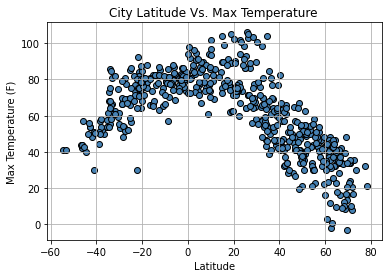

In [13]:
# set x and y values
x_value = city_df['Lat']
y_value = city_df['Max Temp']

# plot scatter
plt.scatter(x_value, y_value,marker="o", facecolors="steelblue", edgecolors="black")

# add labels and grid
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude Vs. Max Temperature ")
plt.grid()

# save image 
plt.savefig("Images/Lat_vs_temp_plot.png")
plt.show()

## Latitude vs. Humidity Plot

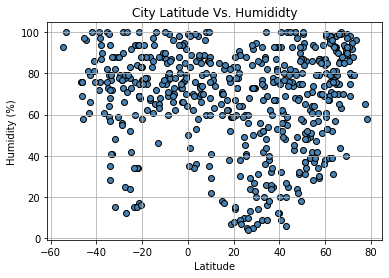

In [14]:
# set x and y values
x_value = city_df['Lat']
y_value = city_df['Humidity']

# plot scatter
plt.scatter(x_value, y_value,marker="o", facecolors="steelblue", edgecolors="black")

# add labels and grid
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude Vs. Humididty")
plt.grid()

# save image 
plt.savefig("Images/Lat_vs_humidity_plot.png")
plt.show()

## Latitude vs. Cloudiness Plot

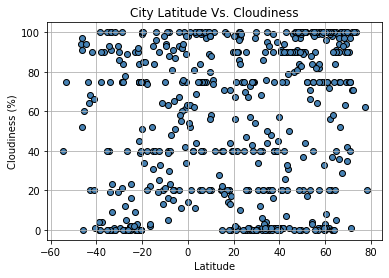

In [15]:
# set x and y values
x_value = city_df['Lat']
y_value = city_df['Cloudiness']

plt.scatter(x_value, y_value,marker="o", facecolors="steelblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude Vs. Cloudiness")
plt.grid()

plt.savefig("Images/Lat_vs_cloudiness_plot.png")
plt.show()

## Latitude vs. Wind Speed Plot

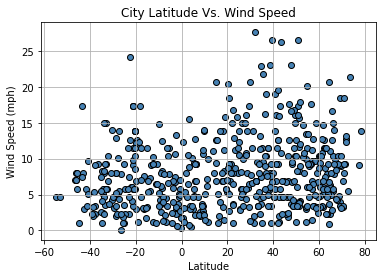

In [16]:
# set x and y values
x_value = city_df['Lat']
y_value = city_df['Wind Speed']

plt.scatter(x_value, y_value,marker="o", facecolors="steelblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude Vs. Wind Speed")
plt.grid()

plt.savefig("Images/Lat_vs_windspeed_plot.png")
plt.show()

## Linear Regression

In [17]:
Nth_hem_df = city_df[city_df["Lat"] >=0]
Sth_hem_df = city_df[city_df["Lat"] <0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.84


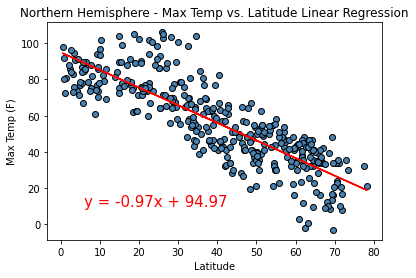

In [18]:
# set x and y values
x_value = Nth_hem_df['Lat']
y_value = Nth_hem_df['Max Temp']

correlation = st.pearsonr(x_value,y_value)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

regress_value = x_value * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_value,regress_value,"r-")

plt.scatter(x_value, y_value,marker="o", facecolors="steelblue", edgecolors="black")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-value is: {round(correlation[0],2)}")

plt.savefig("Images/Nth_temp_lat_linereg.png")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.72


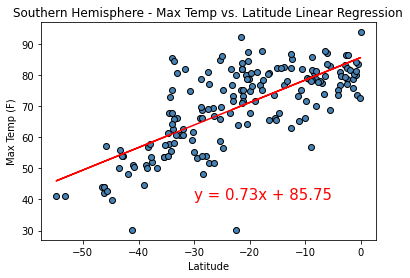

In [19]:
# set x and y values
x_value = Sth_hem_df['Lat']
y_value = Sth_hem_df['Max Temp']

correlation = st.pearsonr(x_value,y_value)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

regress_value = x_value * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_value,regress_value,"r-")

plt.scatter(x_value, y_value,marker="o", facecolors="steelblue", edgecolors="black")

plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-value is: {round(correlation[0],2)}")

plt.savefig("Images/Sth_temp_lat_linereg.png")
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.17


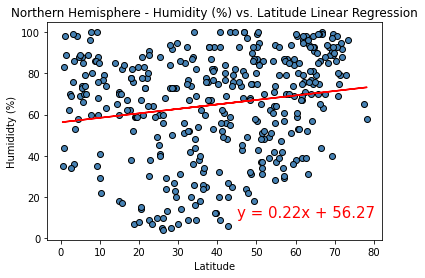

In [20]:
# set x and y values
x_value = Nth_hem_df['Lat']
y_value = Nth_hem_df['Humidity']

correlation = st.pearsonr(x_value,y_value)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_value,"r-")

plt.scatter(x_value, y_value,marker="o", facecolors="steelblue", edgecolors="black")

plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humididty (%)")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

print(f"The r-value is: {round(correlation[0],2)}")

plt.savefig("Images/Nth_hum_lat_linereg.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.06


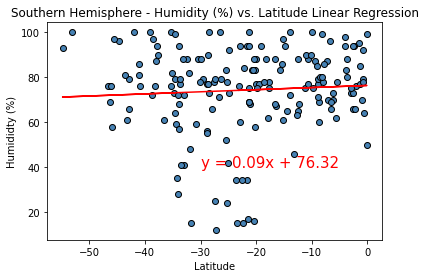

In [21]:
# set x and y values
x_value = Sth_hem_df['Lat']
y_value = Sth_hem_df['Humidity']

correlation = st.pearsonr(x_value,y_value)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_value,"r-")

plt.scatter(x_value, y_value,marker="o", facecolors="steelblue", edgecolors="black")

plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humididty (%)")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

print(f"The r-value is: {round(correlation[0],2)}")

plt.savefig("Images/Sth_hum_lat_linereg.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.15


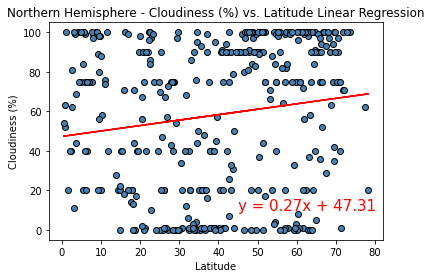

In [22]:
# set x and y values
x_value = Nth_hem_df['Lat']
y_value = Nth_hem_df['Cloudiness']

correlation = st.pearsonr(x_value,y_value)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_value,"r-")

plt.scatter(x_value, y_value,marker="o", facecolors="steelblue", edgecolors="black")

plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

print(f"The r-value is: {round(correlation[0],2)}")

plt.savefig("Images/Nth_cloud_lat_linereg.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.13


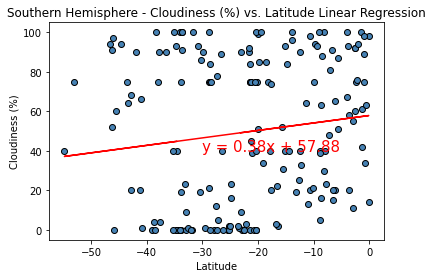

In [23]:
# set x and y values
x_value = Sth_hem_df['Lat']
y_value = Sth_hem_df['Cloudiness']

correlation = st.pearsonr(x_value,y_value)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_value,"r-")

plt.scatter(x_value, y_value,marker="o", facecolors="steelblue", edgecolors="black")

plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

print(f"The r-value is: {round(correlation[0],2)}")

plt.savefig("Images/Sth_cloud_lat_linereg.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.11


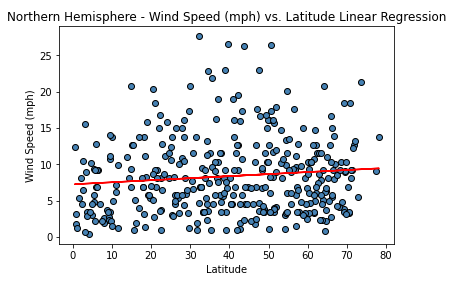

In [24]:
# set x and y values
x_value = Nth_hem_df['Lat']
y_value = Nth_hem_df['Wind Speed']

correlation = st.pearsonr(x_value,y_value)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_value,"r-")

plt.scatter(x_value, y_value,marker="o", facecolors="steelblue", edgecolors="black")

plt.annotate(line_eq,(45,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

print(f"The r-value is: {round(correlation[0],2)}")

plt.savefig("Images/Nth_wind_lat_linereg.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.05


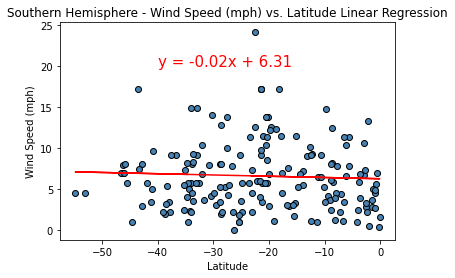

In [25]:
# set x and y values
x_value = Sth_hem_df['Lat']
y_value = Sth_hem_df['Wind Speed']

correlation = st.pearsonr(x_value,y_value)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_value,"r-")
plt.scatter(x_value, y_value,marker="o", facecolors="steelblue", edgecolors="black")

plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

print(f"The r-value is: {round(correlation[0],2)}")

plt.savefig("Images/Sth_wind_lat_linereg.png")
plt.show()